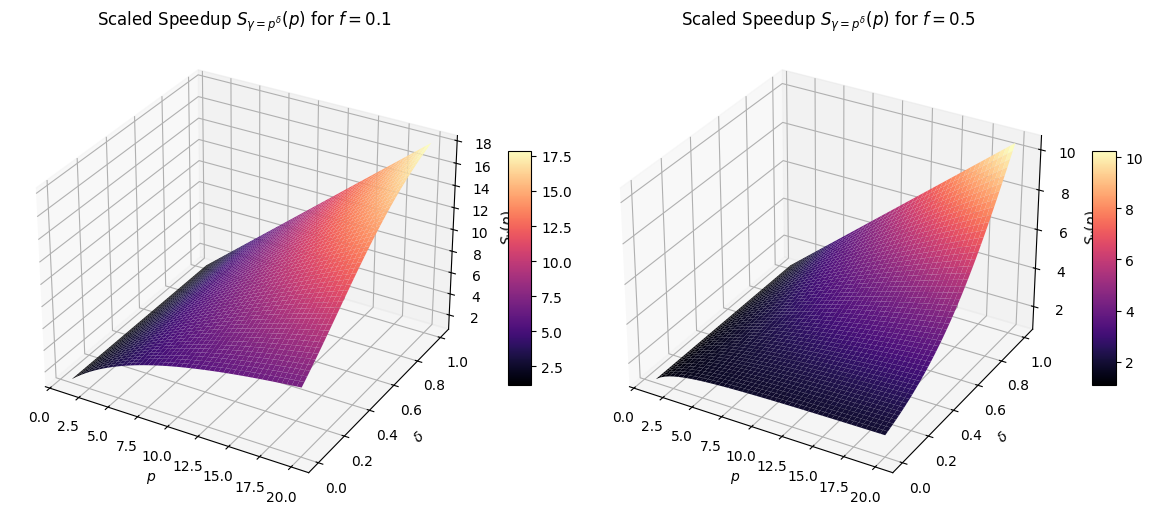

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


def scaled_speedup(p, delta, f):
    """
    Computes: S_{gamma=p^delta}(p) = (f + (1 - f) * p^delta) / (f + (1 - f) * p^(delta - 1))
    """
    numerator   = f + (1.0 - f)*p**delta
    denominator = f + (1.0 - f)*p**(delta - 1.0)
    return numerator / denominator

# Create ranges for p and delta
p_vals     = np.linspace(1.0, 20.0, 50)  # e.g. from 1 to 20
delta_vals = np.linspace(0.0, 1.0, 50)   # from 0 to 1

# Construct a 2D grid of (p, delta) pairs
P, Delta = np.meshgrid(p_vals, delta_vals)

# We'll examine two sequential fractions side by side
f_values = [0.1, 0.5]

fig = plt.figure(figsize=(12, 5))

for i, f in enumerate(f_values, start=1):
    ax = fig.add_subplot(1, 2, i, projection='3d')
    S = scaled_speedup(P, Delta, f)
    
    # Plot surface
    surf = ax.plot_surface(P, Delta, S, cmap='magma' , edgecolor='none')
    
    ax.set_title(rf"Scaled Speedup $S_{{\gamma=p^\delta}}(p)$ for $f={f}$")
    ax.set_xlabel(r"$p$")
    ax.set_ylabel(r"$\delta$")
    ax.set_zlabel(r"$S_{\gamma}(p)$")

    # Add colorbar for each subplot
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)

plt.tight_layout()
plt.show()

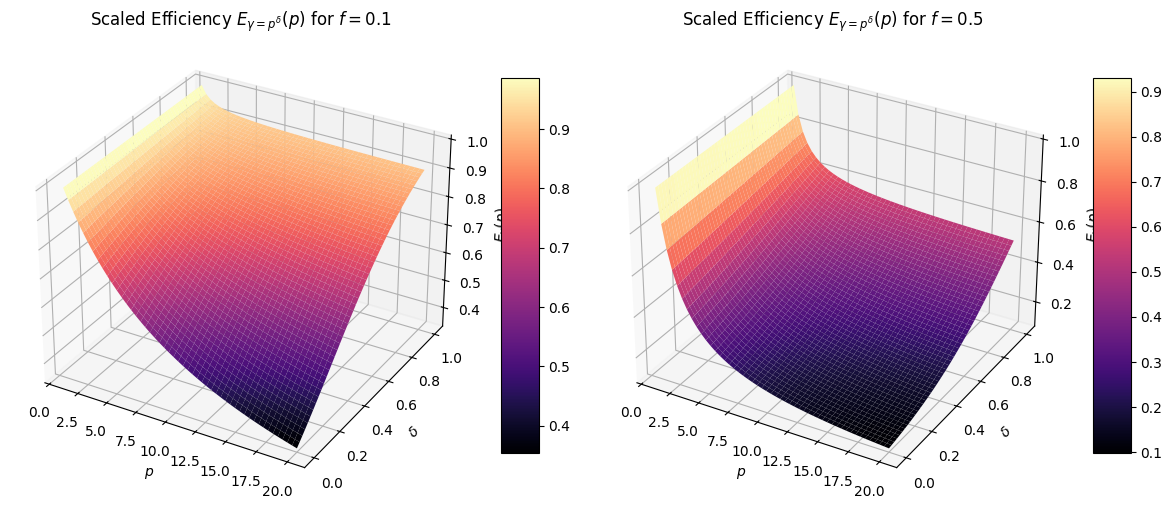

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def scaled_efficiency(p, delta, f):
    """
    Implements:
      E_{p^delta}(p) = (f + (1-f)*p^delta) / [p*f + (1-f)*p^delta]
    """
    numerator   = f + (1.0 - f)*p**delta
    denominator = p*f + (1.0 - f)*p**delta
    return numerator / denominator

# Ranges for p and delta
p_vals     = np.linspace(1.0, 20.0, 50)  # from 1 to 20
delta_vals = np.linspace(0.0, 1.0, 50)   # from 0 to 1

# Create a 2D grid of (p, delta) coordinate pairs
P, Delta = np.meshgrid(p_vals, delta_vals)

# We'll compare f = 0.1 and f = 0.5 side by side
f_values = [0.1, 0.5]

fig = plt.figure(figsize=(12,5))

for i, f in enumerate(f_values, start=1):
    ax = fig.add_subplot(1, 2, i, projection='3d')
    
    # Compute efficiency on the grid
    E = scaled_efficiency(P, Delta, f)
    
    # Plot the surface
    surf = ax.plot_surface(P, Delta, E, cmap='magma', edgecolor='none')
    
    ax.set_title(rf"Scaled Efficiency $E_{{\gamma=p^\delta}}(p)$ for $f={f}$")
    ax.set_xlabel(r"$p$")
    ax.set_ylabel(r"$\delta$")
    ax.set_zlabel(r"$E_{\gamma}(p)$")
    
    # Add colorbar for each subplot
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)

plt.tight_layout()
plt.show()